## **Importing the libraries**

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import plotly.express as px
from sklearn.preprocessing import StandardScaler

## **Loading The Dataset**

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df

User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]

In [3]:
df_chi = df.copy()

In [4]:
df_chi

User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]

In [5]:
df_chi = df_chi.drop('User ID', axis=1)
df_chi

Gender  Age  EstimatedSalary  Purchased
0      Male   19            19000          0
1      Male   35            20000          0
2    Female   26            43000          0
3    Female   27            57000          0
4      Male   19            76000          0
..      ...  ...              ...        ...
395  Female   46            41000          1
396    Male   51            23000          1
397  Female   50            20000          1
398    Male   36            33000          0
399  Female   49            36000          1

[400 rows x 4 columns]

## **We don't need user id, so just dropping that column**

In [6]:
df = df.drop('User ID', axis=1)
df

Gender  Age  EstimatedSalary  Purchased
0      Male   19            19000          0
1      Male   35            20000          0
2    Female   26            43000          0
3    Female   27            57000          0
4      Male   19            76000          0
..      ...  ...              ...        ...
395  Female   46            41000          1
396    Male   51            23000          1
397  Female   50            20000          1
398    Male   36            33000          0
399  Female   49            36000          1

[400 rows x 4 columns]

## **Data Wrangling**

In [7]:
df.describe()

Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000

In [8]:
df.shape

(400, 4)

In [9]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
df.nunique()

Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

In [11]:
df.value_counts()

Gender  Age  EstimatedSalary  Purchased
Female  41   72000            0            3
Male    40   57000            0            3
        42   65000            0            2
             54000            0            2
        35   75000            0            2
                                          ..
Female  42   90000            1            1
             80000            1            1
             79000            0            1
             75000            0            1
Male    60   102000           1            1
Length: 380, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


## **EDA**

In [13]:
corr = df.corr(method='pearson')

<AxesSubplot:>

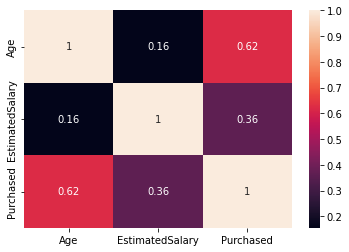

In [14]:
sns.heatmap(corr, annot=True)

In [15]:
px.area(df, x='Age', y='EstimatedSalary')

In [16]:
px.bar(df.head(30), x='Gender', y='Purchased', color='Age')

In [17]:
px.box(df, x='Purchased', y='EstimatedSalary', color='Gender')

## **Machine Learning Part**
**Logistic Regression**

In [18]:
std = StandardScaler()

In [19]:
lb = LabelEncoder()

In [20]:
df['Gender']= lb.fit_transform(df['Gender'])
df

Gender  Age  EstimatedSalary  Purchased
0         1   19            19000          0
1         1   35            20000          0
2         0   26            43000          0
3         0   27            57000          0
4         1   19            76000          0
..      ...  ...              ...        ...
395       0   46            41000          1
396       1   51            23000          1
397       0   50            20000          1
398       1   36            33000          0
399       0   49            36000          1

[400 rows x 4 columns]

## **Feature Scaling**

In [21]:
df[['Age','EstimatedSalary']]=std.fit_transform(df[['Age','EstimatedSalary']])

In [22]:
df

Gender       Age  EstimatedSalary  Purchased
0         1 -1.781797        -1.490046          0
1         1 -0.253587        -1.460681          0
2         0 -1.113206        -0.785290          0
3         0 -1.017692        -0.374182          0
4         1 -1.781797         0.183751          0
..      ...       ...              ...        ...
395       0  0.797057        -0.844019          1
396       1  1.274623        -1.372587          1
397       0  1.179110        -1.460681          1
398       1 -0.158074        -1.078938          0
399       0  1.083596        -0.990844          1

[400 rows x 4 columns]

In [23]:
x= df.iloc[:,0:3]
x

Gender       Age  EstimatedSalary
0         1 -1.781797        -1.490046
1         1 -0.253587        -1.460681
2         0 -1.113206        -0.785290
3         0 -1.017692        -0.374182
4         1 -1.781797         0.183751
..      ...       ...              ...
395       0  0.797057        -0.844019
396       1  1.274623        -1.372587
397       0  1.179110        -1.460681
398       1 -0.158074        -1.078938
399       0  1.083596        -0.990844

[400 rows x 3 columns]

In [24]:
y = df.iloc[:,3:]
y

Purchased
0            0
1            0
2            0
3            0
4            0
..         ...
395          1
396          1
397          1
398          0
399          1

[400 rows x 1 columns]

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

## **Model**

In [26]:
model = LogisticRegression()

In [27]:
model.fit(x_train,y_train)

C:\Users\Ali Hasnain\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression()

In [28]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [29]:
print("The accuracy score in training is ",model.score(x_train,y_train))

The accuracy score in training is  0.85


In [30]:
print("The Accuracy Score In Testing The Model Is",model.score(x_test, y_test))

The Accuracy Score In Testing The Model Is 0.8083333333333333


## **Overall accuracy**

In [31]:
from sklearn.metrics import accuracy_score
print("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.8083333333333333


## **Wild Test**

In [32]:
import statsmodels.formula.api as smf 

In [33]:
mlr = smf.ols(formula='Purchased ~ Gender + Age + EstimatedSalary', data=df).fit() 

In [48]:
waldtest = mlr.wald_test(r_matrix="Gender", use_f=True)
waldtest

C:\Users\Ali Hasnain\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:1889: FutureWarning:

The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.



<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[0.20751194]]), p=0.6489742192133225, df_denom=396, df_num=1>

In [49]:
waldtest = mlr.wald_test(r_matrix="Age", use_f=True)
waldtest

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[240.80571619]]), p=9.172381068412118e-43, df_denom=396, df_num=1>

In [50]:
waldtest = mlr.wald_test(r_matrix="EstimatedSalary", use_f=True)
waldtest

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[53.14397628]]), p=1.6974727485878165e-12, df_denom=396, df_num=1>

## **Likelihood test**

In [35]:
import statsmodels.api as sm

In [36]:
full_model = sm.OLS(y_train, x_train).fit()

In [37]:
full_ll = full_model.llf
full_ll

-158.12547695614973

## **Confusion Matrix**

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)


Confusion Matrix : 
 [[63  9]
 [14 34]]


Here 63 + 34 values are correctly predicit by our model and 14 + 9 values are predicit wrong

## **Overall summary**

In [39]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.390262
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.401     
Dependent Variable: Purchased        AIC:              318.2094  
Date:               2022-08-10 14:13 BIC:              330.1837  
No. Observations:   400              Log-Likelihood:   -156.10   
Df Model:           2                LL-Null:          -260.79   
Df Residuals:       397              LLR p-value:      3.4456e-46
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Gender            -0.9111   0.2051 -4.4425 0.0000 -1.3130 -0.5091
Age                2.1095   0.2308  9.1381 0.0000  1.6570  2.5619


In [40]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.363517
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.433     
Dependent Variable: Purchased        AIC:              209.5695  
Date:               2022-08-10 14:14 BIC:              220.4738  
No. Observations:   280              Log-Likelihood:   -101.78   
Df Model:           2                LL-Null:          -179.36   
Df Residuals:       277              LLR p-value:      2.0456e-34
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Gender            -0.8981   0.2432 -3.6924 0.0002 -1.3749 -0.4214
Age                2.2403   0.3052  7.3394 0.0000  1.6420  2.8386


In [41]:
import statsmodels.api as sm
logit_model=sm.Logit(y_test,x_test)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.425425
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.368     
Dependent Variable: Purchased        AIC:              108.1021  
Date:               2022-08-10 14:14 BIC:              116.4645  
No. Observations:   120              Log-Likelihood:   -51.051   
Df Model:           2                LL-Null:          -80.761   
Df Residuals:       117              LLR p-value:      1.2501e-13
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Gender            -0.9336   0.3919 -2.3819 0.0172 -1.7018 -0.1654
Age                2.0190   0.3778  5.3441 0.0000  1.2785  2.7595


In [42]:
import statsmodels.api as sm
logit_model=sm.Logit(y_test,y_pred)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.628605
         Iterations 5
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.066   
Dependent Variable: Purchased        AIC:              152.8653
Date:               2022-08-10 14:14 BIC:              155.6528
No. Observations:   120              Log-Likelihood:   -75.433 
Df Model:           0                LL-Null:          -80.761 
Df Residuals:       119              LLR p-value:      nan     
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     5.0000                                     
------------------------------------------------------------------
        Coef.     Std.Err.      z       P>|z|     [0.025    0.975]
------------------------------------------------------------------
x1      1.3291      0.3749    3.5457    0.0004    0.5944    2.0639



Compute precision, recall, F-measure and support
To quote from Scikit Learn:

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        72
           1       0.79      0.71      0.75        48

    accuracy                           0.81       120
   macro avg       0.80      0.79      0.80       120
weighted avg       0.81      0.81      0.81       120



## **Chi Square Test**

In [44]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [45]:
stat, p, dof, expected = chi2_contingency(df_chi[['Purchased','Age','EstimatedSalary']])

In [46]:
prob = 0.80
chi = chi2.ppf(prob, dof)
chi

831.4136232054923

In [47]:
if abs(stat) >= chi:
    	print('reject Null hypothesis')
else:
	print('fail to reject')

reject Null hypothesis
